<a href="https://colab.research.google.com/github/RaedAbdelkefi/Facial-Expression-Recognition/blob/main/Marvel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import SeparableConv2D
from keras.optimizers import Adam
from keras import layers
from keras.regularizers import l2
from keras.metrics import Precision, Recall, BinaryAccuracy
from google.colab.patches import cv2_imshow
import cv2

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from sklearn.metrics import accuracy_score
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# !rm -r data # hedhi matexecutihech

#Loading the Data

In [ ]:
!unzip archive.zip # sob data tl9aha f kaggle iktib face recognition avengers haja k haka w baad yaatik zip file , sobo f colab w executih

unzip:  cannot find or open archive.zip, archive.zip.zip or archive.zip.ZIP.


In [ ]:
!mv '/content/images' '/content/data'


#Dataset Overview

In [ ]:
#Variables a utilizar
batch_size = 32
height = 256
width = 256

Found 274 images belonging to 5 classes.


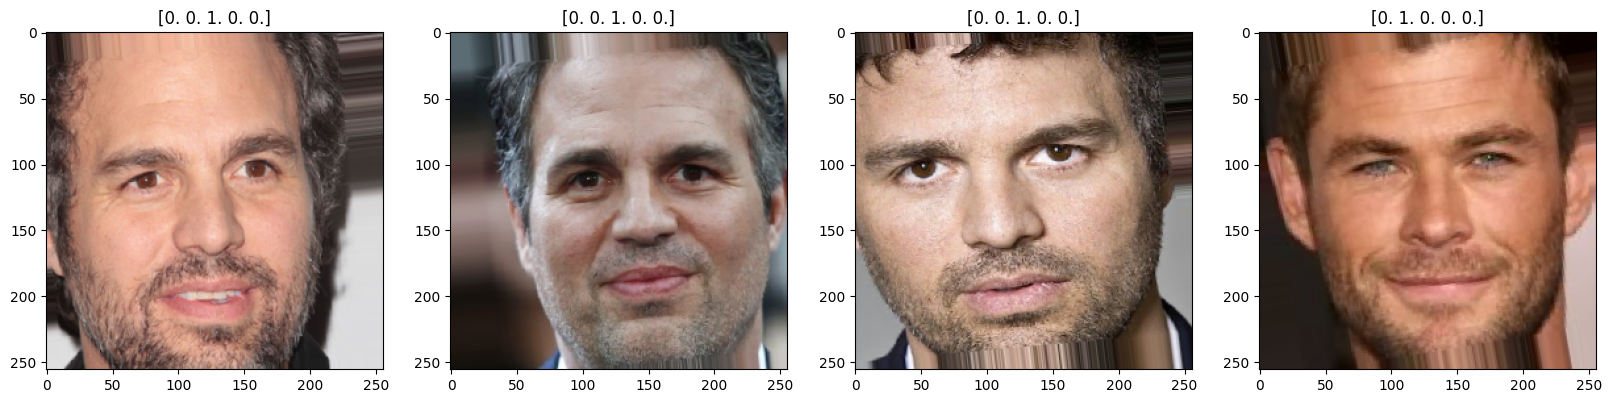

In [ ]:
#lina just habit nara data, choft heka ImagaDataGenerator heka iterator yrescali image w ya9libha w kol ken theb tzid tefhemha
datagen = ImageDataGenerator(
      # Scale the pixel values to [0, 1]
    rescale=1./255,
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=.1,
    horizontal_flip=True,

)
data =datagen.flow_from_directory('/content/data/train',target_size = (256,256),color_mode='rgb',batch_size=32,class_mode='categorical', shuffle=True) #shuffle maanetha rid data random
batch = data.next() # accessing
fig,ax=plt.subplots(ncols=4, figsize=(20,20))
id=0
for i in batch[0][:4]:
  ax[id].imshow(i.astype(float))
  ax[id].title.set_text(batch[1][id])

  id+=1

#Splitting the Data

In [ ]:
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
#lina aawdt nafs lahkeya mchnetnadham f 5edma
# Define the directories where your images are located

# Define the size of your images


# Create an instance of ImageDataGenerator for preprocessing and data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,  # Scale the pixel values to [0, 1]
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=.1,
    horizontal_flip=True,

)
#hedhaya iterator , yrescali
train = datagen.flow_from_directory("data/train/",target_size = (width,height),color_mode='rgb',batch_size=batch_size,class_mode='categorical', shuffle=True,)
val = datagen.flow_from_directory("data/val/",target_size = (width,height),color_mode='rgb',batch_size=batch_size,class_mode='categorical',shuffle=True)
test = datagen.flow_from_directory("data/test/",target_size = (width,height),color_mode='rgb',batch_size=batch_size,class_mode='categorical',shuffle=False)


Found 274 images belonging to 5 classes.
Found 60 images belonging to 5 classes.
Found 60 images belonging to 5 classes.


In [ ]:
train.class_indices

{'chris_evans': 0,
 'chris_hemsworth': 1,
 'mark_ruffalo': 2,
 'robert_downey_jr': 3,
 'scarlett_johansson': 4}

In [ ]:
batch=train.next()#.next t5alik tod5ol f iterator l inti snaato t5arajlik X w y


In [ ]:
batch[1].shape #32 hita batch_size lawaj aliha f internet mchtefhemha w 5 hiya numero de class, batch[1] hiya y w batch[0] hiya x

(32, 5)

In [ ]:
Avengers={0:'Captain America',1:'Thor',2:'Hulk',3:'Iron Man',4:'Black Widow'}

#Building the Model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam


In [ ]:
#ifhim CNN
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [ ]:

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 30, 30, 16)      

In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)

hist = model.fit(train, epochs=30, validation_data=val) #badal callbacks



Epoch 1/30
9/9 [==============================] - 7s 737ms/step - loss: 2.1417 - accuracy: 0.1825 - val_loss: 1.6197 - val_accuracy: 0.2000
Epoch 2/30
9/9 [==============================] - 6s 718ms/step - loss: 1.6121 - accuracy: 0.2190 - val_loss: 1.6036 - val_accuracy: 0.2667
Epoch 3/30
9/9 [==============================] - 5s 613ms/step - loss: 1.5954 - accuracy: 0.2847 - val_loss: 1.5883 - val_accuracy: 0.2667
Epoch 4/30
9/9 [==============================] - 7s 804ms/step - loss: 1.5562 - accuracy: 0.2956 - val_loss: 1.5551 - val_accuracy: 0.2833
Epoch 5/30
9/9 [==============================] - 6s 659ms/step - loss: 1.5216 - accuracy: 0.3175 - val_loss: 1.5317 - val_accuracy: 0.3333
Epoch 6/30
9/9 [==============================] - 6s 693ms/step - loss: 1.5064 - accuracy: 0.3686 - val_loss: 1.4296 - val_accuracy: 0.3833
Epoch 7/30
9/9 [==============================] - 5s 605ms/step - loss: 1.4165 - accuracy: 0.3650 - val_loss: 1.4164 - val_accuracy: 0.5333
Epoch 8/30
9/9 [====

#Visualize Training Performance

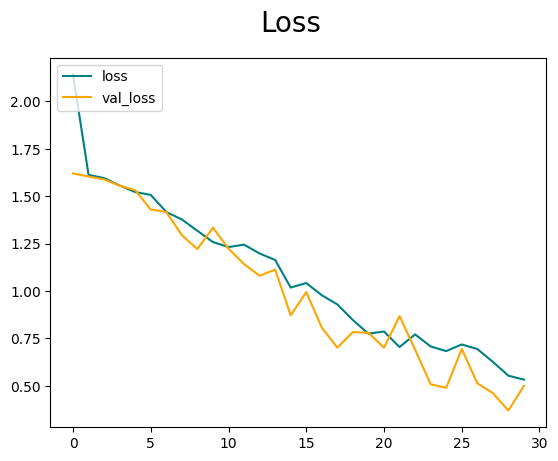

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

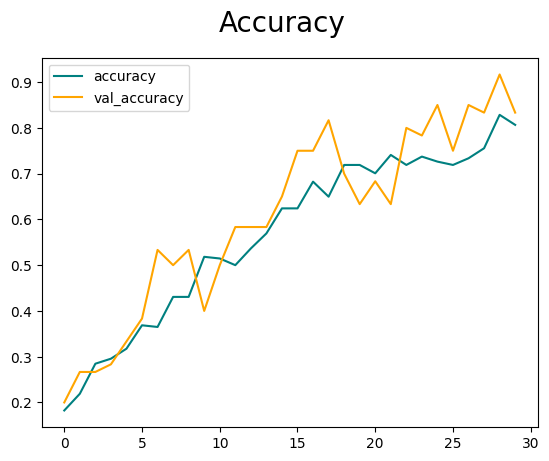

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#Evaluate Test Performance

In [ ]:
model.evaluate(test)

2/2 [==============================] - 2s 821ms/step - loss: 0.5538 - accuracy: 0.7667


[0.5538359880447388, 0.7666666507720947]

#Testing the Model

In [ ]:
def get_face(img):
  facecasc = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
  img=cv2.imread(img)
  img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  image=img
  faces = facecasc.detectMultiScale(img,scaleFactor=1.3, minNeighbors=10)
  if len(faces)==0:
    return None
  i=1
  for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    baba = img[y:y + h, x:x + w]
    baba = cv2.resize(baba, (256, 256))
    cv2_imshow(baba)
    baba=baba/255
    baba = np.expand_dims(baba, axis=0)

    prediction = model.predict(baba)

    maxindex = int(np.argmax(prediction))
    person=Avengers[maxindex]
    pred=prediction[0][maxindex]
    print(prediction[0][maxindex])
    if pred < 0.4:
      person="unknown"

    print("person ",i," : ",person)
    cv2.putText(image, person, (x+10, y-20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    i+=1
  image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  cv2_imshow(image)
    # img = np.expand_dims(img, axis=-1)
    # img = np.repeat(img, 3, axis=-1)                     #croping



In [ ]:
from keras.models import load_model

model= load_model('/content/model2 (1).h5')

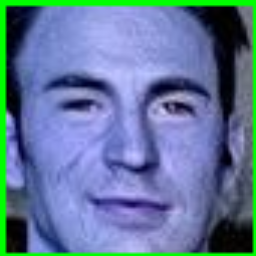

1/1 [==============================] - 0s 21ms/step
0.49225524
person  1  :  Captain America


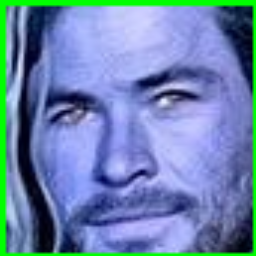

1/1 [==============================] - 0s 20ms/step
0.39675987
person  2  :  unknown


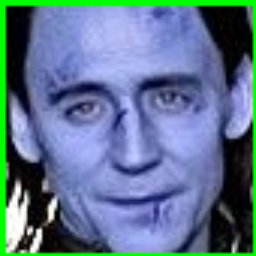

1/1 [==============================] - 0s 18ms/step
0.70258456
person  3  :  Captain America


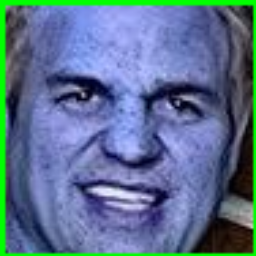

1/1 [==============================] - 0s 19ms/step
0.9907032
person  4  :  Hulk


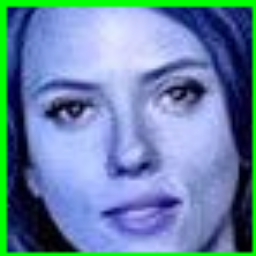

1/1 [==============================] - 0s 22ms/step
0.8950935
person  5  :  Black Widow


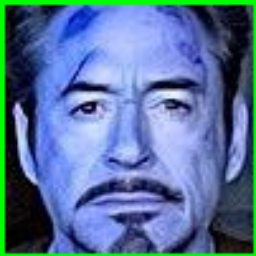

1/1 [==============================] - 0s 21ms/step
0.6466727
person  6  :  Iron Man


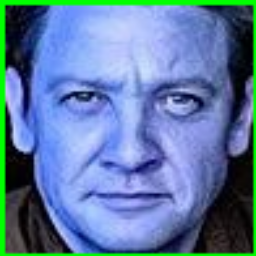

1/1 [==============================] - 0s 20ms/step
0.54842573
person  7  :  Captain America


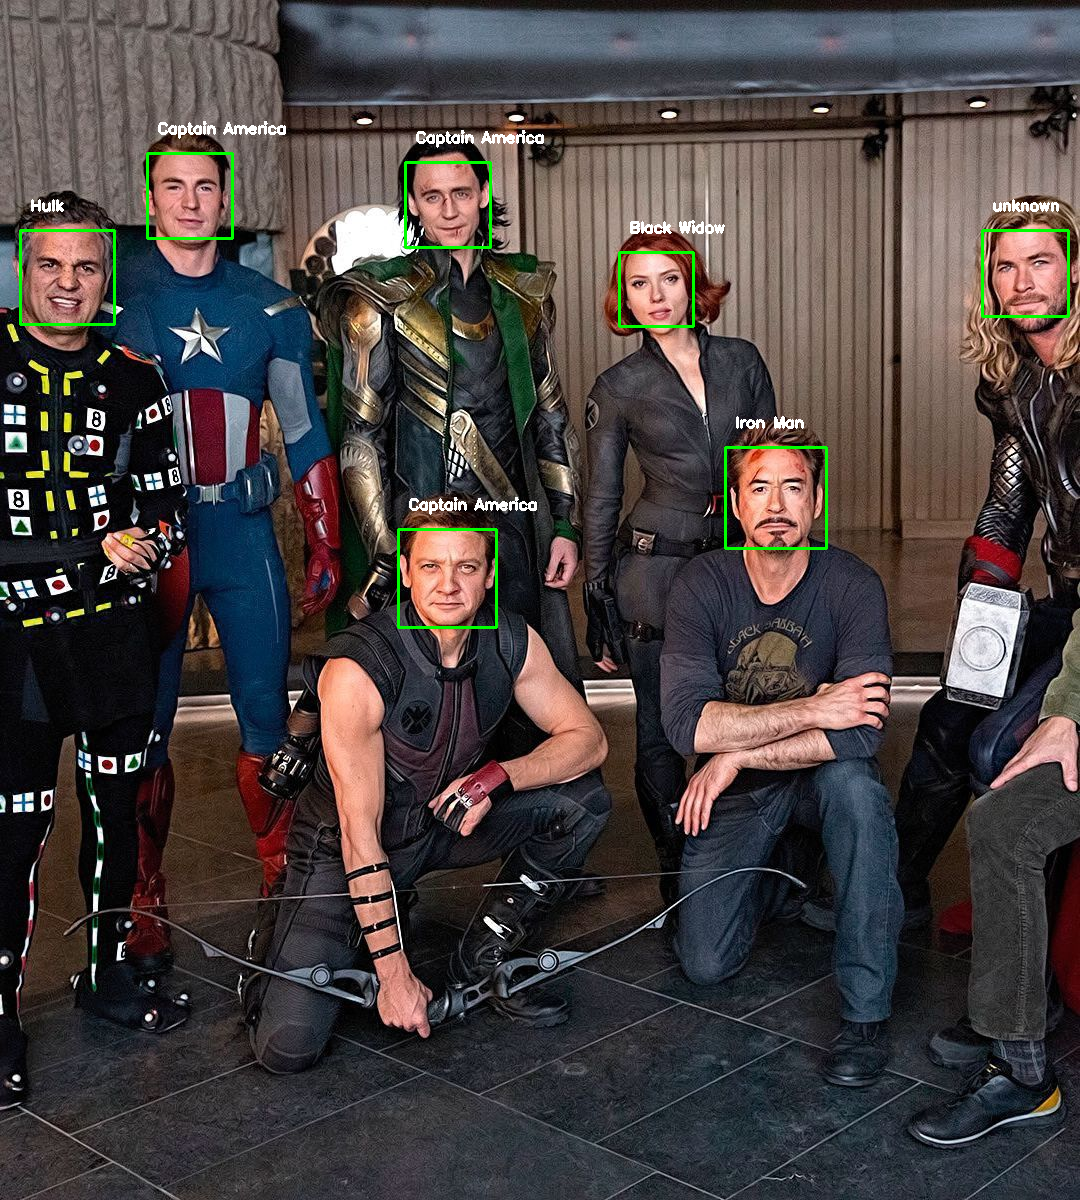

In [ ]:
img = get_face('/content/sasa.jpg')

#Saving the Model

In [ ]:
model.save('model2.h5')


In [ ]:
# from google.colab import files
# files.download('model2.h5')

In [ ]:
!jupyter nbconvert --to html <path_to_downloaded_ipynb_file>.ipynb
